In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import regex as re
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
!pip install xgboost
from xgboost import XGBRegressor


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.2/99.8 MB 1.1 MB/s eta 0:01:33
   ---------------------------------------- 0.2/99.8 MB 1.1 MB/s eta 0:01:33
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------------------- 0.5/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------

In [4]:
data=pd.read_csv(r"C:\ml\da\SolarPrediction.csv")

In [5]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [6]:

data['Data']=data['Data'].apply(lambda x:x.split(" ")[0])

In [7]:
data['date']=pd.to_datetime(data['Data']).dt.day
data['month']=pd.to_datetime(data['Data']).dt.month

data['hour']=pd.to_datetime(data['Time']).dt.hour
data['min']=pd.to_datetime(data['Time']).dt.minute
data['sec']=pd.to_datetime(data['Time']).dt.second


data['risehour'] = data['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
data['riseminuter'] = data['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

data['sethour'] = data['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
data['setminute'] = data['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [8]:
data=data.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1)

In [9]:
y=data['Radiation']
x=data.drop(["Radiation"],axis=1)

In [10]:
data['hour']=data['hour'].astype(int)
data

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,date,month,hour,min,sec,risehour,riseminuter,sethour,setminute
0,1.21,48,30.46,59,177.39,5.62,29,9,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,29,9,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,29,9,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,29,9,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,29,9,23,35,24,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,1,12,0,20,4,6,41,17,42
32682,1.17,44,30.42,102,117.78,6.75,1,12,0,15,1,6,41,17,42
32683,1.20,44,30.42,102,145.19,9.00,1,12,0,10,1,6,41,17,42
32684,1.23,44,30.42,101,164.19,7.87,1,12,0,5,2,6,41,17,42


<Axes: >

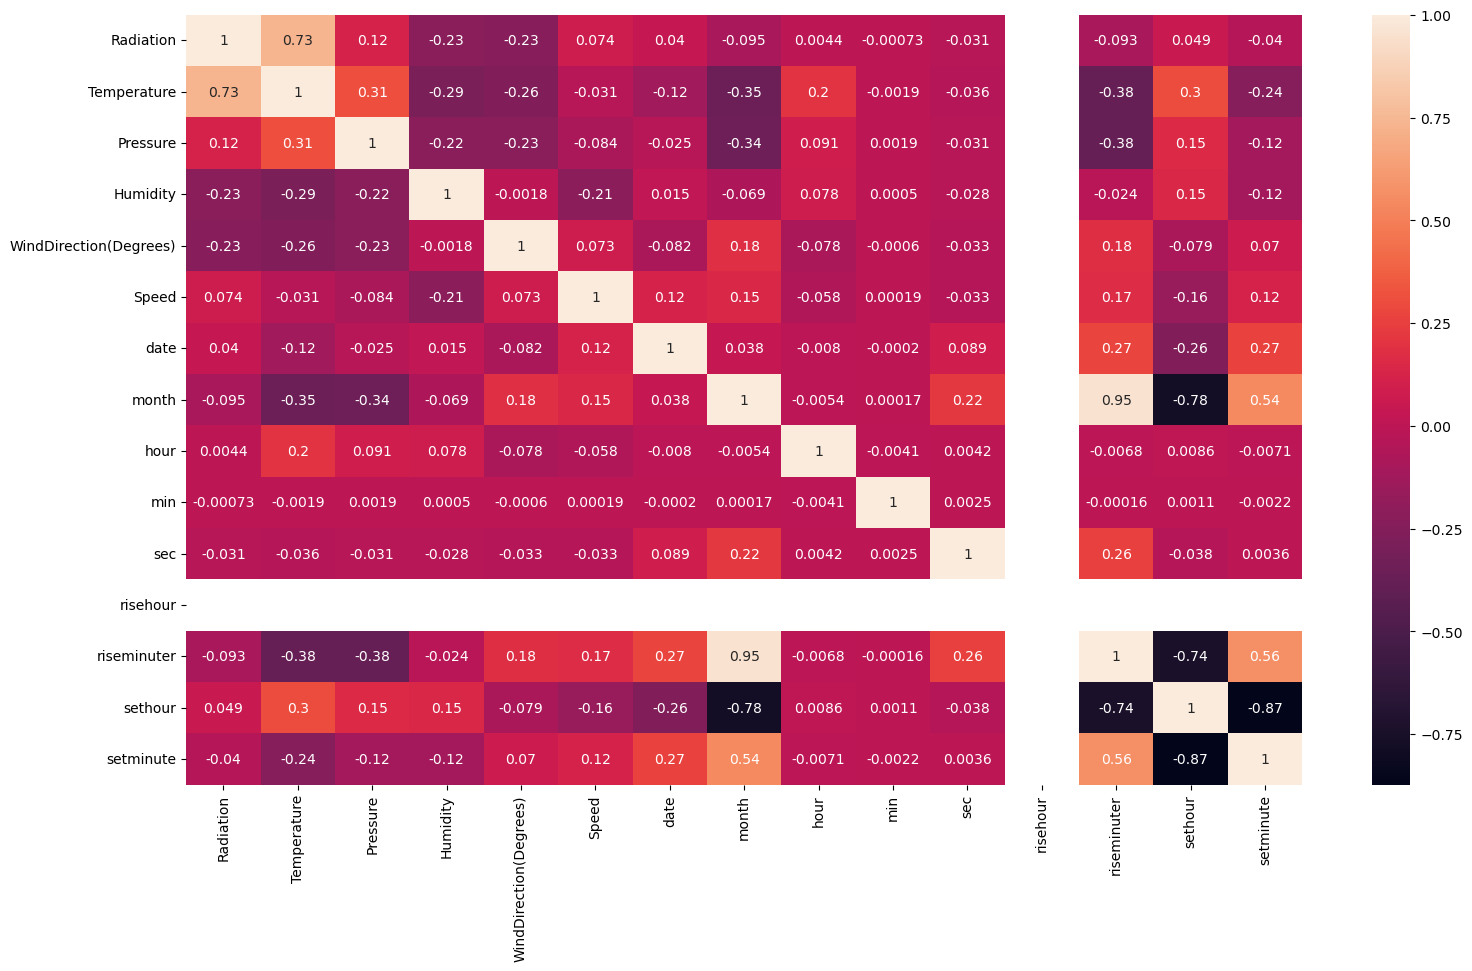

In [11]:
corr=data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True)

<Axes: xlabel='Temperature', ylabel='Density'>

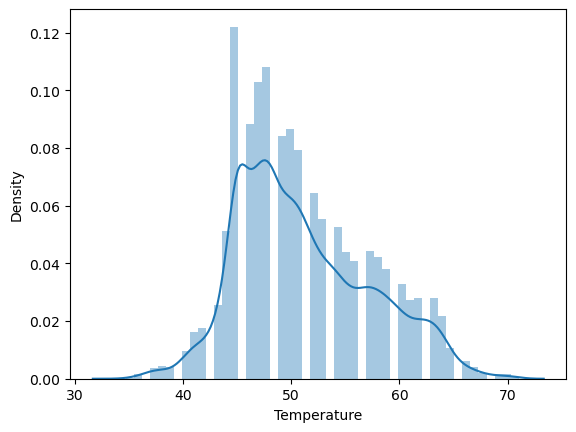

In [12]:
sns.distplot(data["Temperature"])


<Axes: xlabel='Speed', ylabel='Density'>

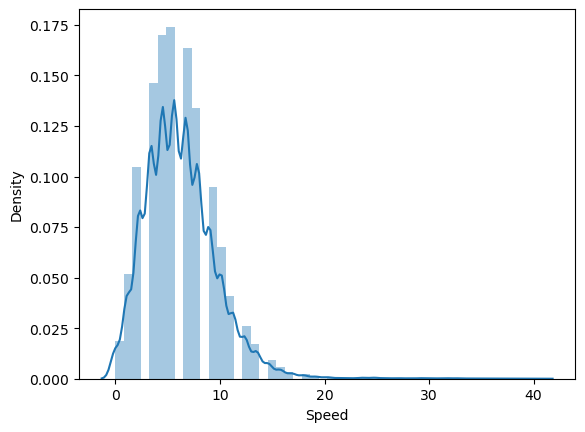

In [13]:
sns.distplot(data["Speed"])


<Axes: ylabel='Density'>

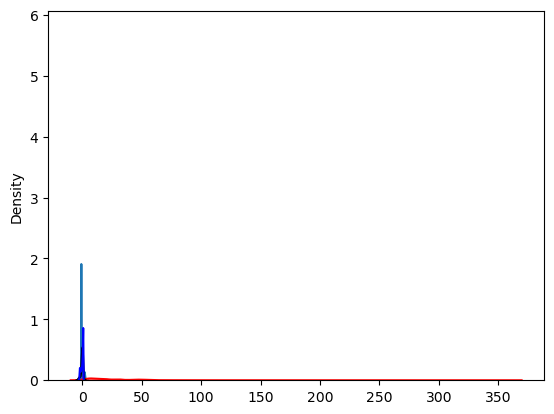

In [14]:
scr=StandardScaler()
y=data['Temperature']
y=scr.fit_transform(data.Temperature.values.reshape(-1,1))
sns.distplot(scr.fit_transform(data["Radiation"].values.reshape(-1,1)))
sns.distplot(x,color="red")
sns.distplot(scr.fit_transform(data.Pressure.values.reshape(-1,1)),color="black")
sns.distplot(scr.fit_transform(data.Humidity.values.reshape(-1,1)),color="blue")

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_y=encoder.fit_transform(y)
x.shape

(32686, 14)

In [16]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
best_fe=SelectKBest(score_func=chi2,k=10)

In [17]:
target_cont = data['Radiation'].apply(lambda x : int(x*100))
scaled_input_features = MinMaxScaler().fit_transform(x)
fit=best_fe.fit(scaled_input_features,target_cont)

In [18]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [19]:
featureScores = pd.concat([column, scores], axis=1)

#naming the dataframe columns
featureScores.columns = ['Features', 'feature_imp'] 

<BarContainer object of 14 artists>

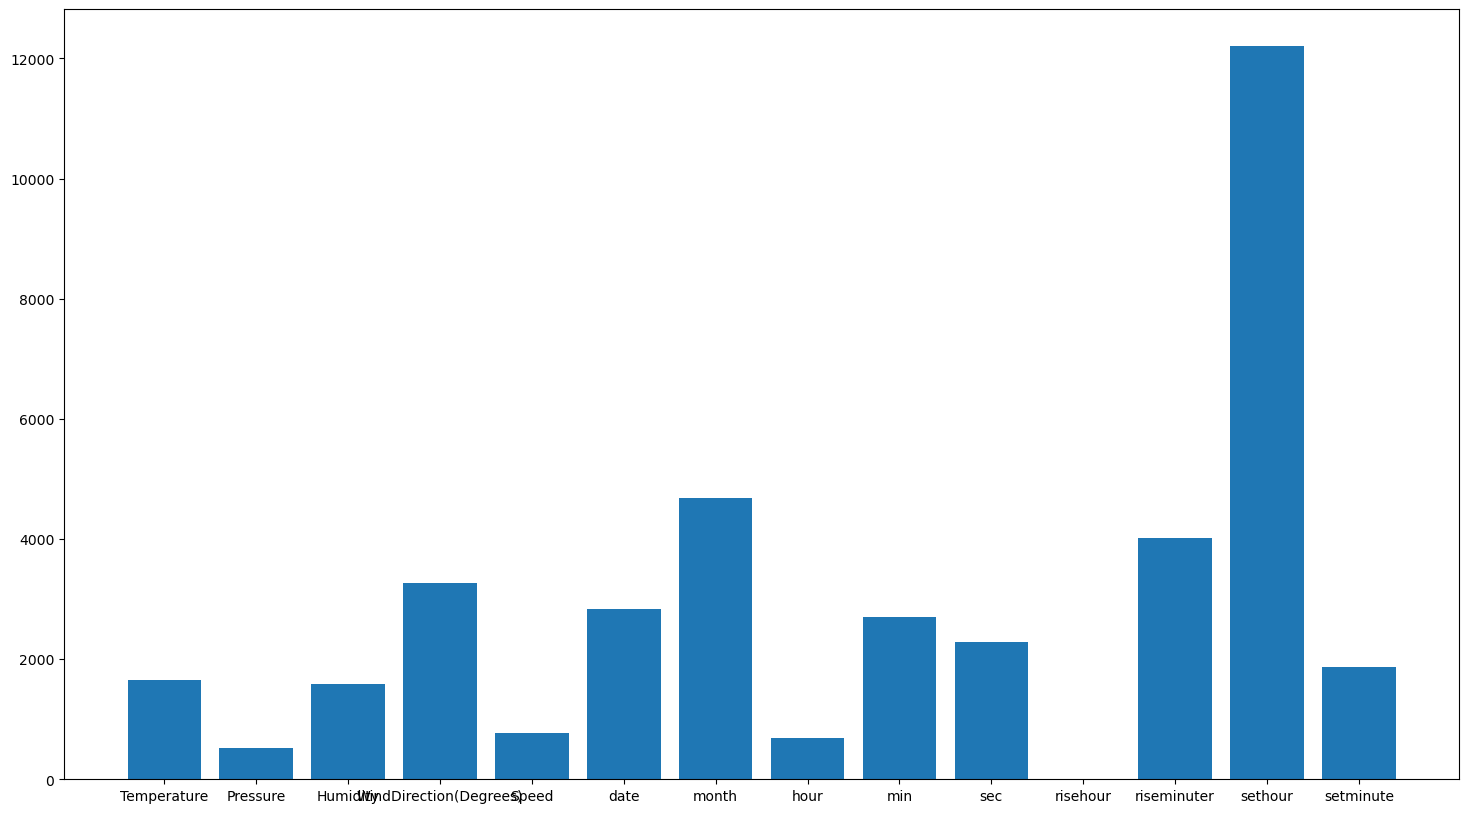

In [20]:
plt.figure(figsize=(18,10))
plt.bar(featureScores.Features,featureScores.feature_imp)

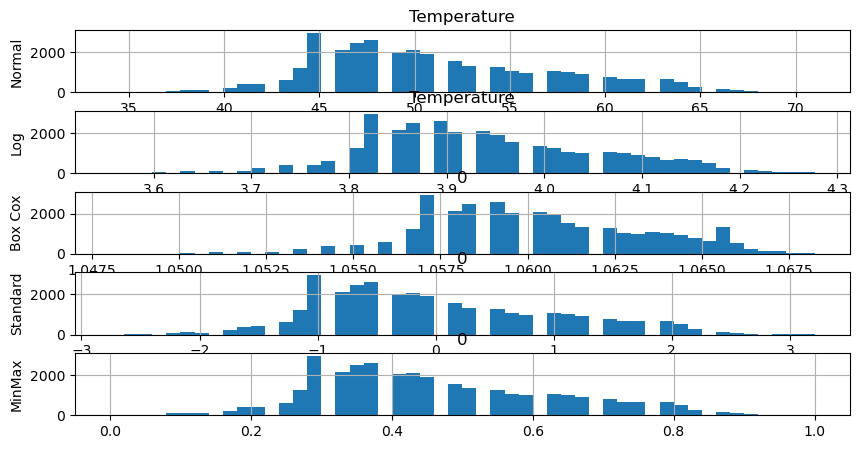

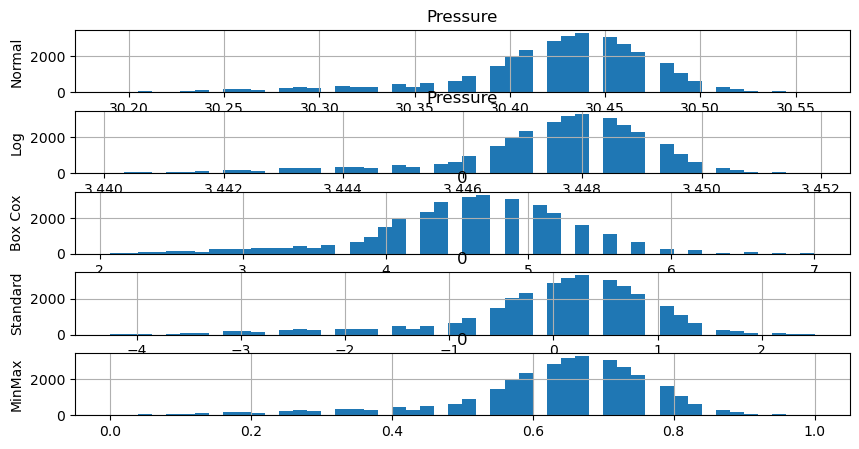

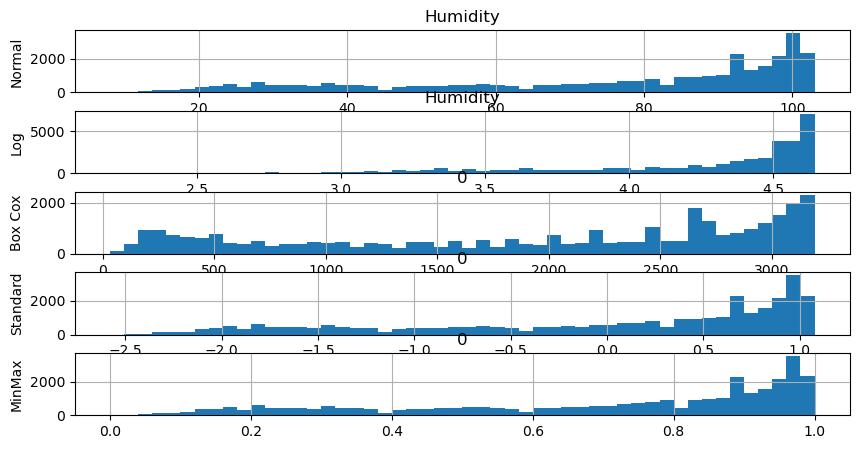

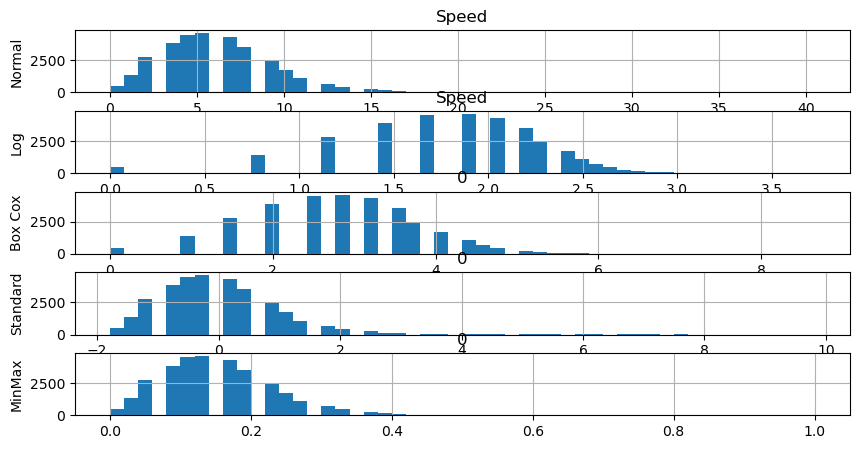

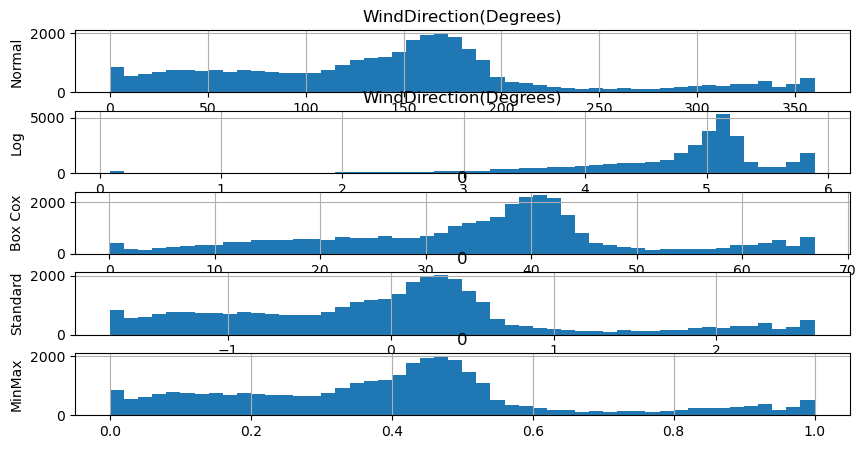

In [21]:
features_to_transform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']

for i in features_to_transform:
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))
    
    pd.DataFrame(x[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((x[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(x[i]+1)[0]).hist(ax = ax3, bins = 50)    
    pd.DataFrame(StandardScaler().fit_transform(np.array(x[i]).reshape(-1, 1))).hist(ax = ax4, bins = 50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(x[i]).reshape(-1, 1))).hist(ax = ax5, bins = 50)
    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

In [22]:
transform = {'Temperature' : (x['Temperature']+1).transform(np.log), 
             'Pressure': stats.boxcox(x['Pressure']+1)[0], 
            'Humidity' : stats.boxcox(x['Humidity']+1)[0], 
            'Speed' : (x['Speed']+1).transform(np.log), 
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(x['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    x[i] = transform[i]

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [24]:
# declare parameters
params = {
    'learning_rate': 0.1,
    'max_depth': 8}

from xgboost import XGBRegressor
model = XGBRegressor(**params)

In [25]:
# train the model
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred = model.predict(xtest)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.00
R2: 1.00
